<div align="center">
    <h1>Schools History and Geography Education Project(SHGE)</h1>
    <h4>Project:The Battle of Neighborhoods (Week 2)</h4>
</div>

<html>
   <body>
      <div> 
       <h1>Contents</h1>
         <ol>
            <li><a href="Introduction and background.xhtml">Introduction and background</a></li>
            <li><a href="Data Description Summary.xhtml">Data Description Summary</a></li>
            <li><a href="Data Exploration.xhtml">Data Exploration and Analysis</a></li>          
            <li><a href="Applying Foursquare.xhtml">Using Foursquare API for Locations</a></li>
            <li><a href="Hotel Accommodation Restaurant.xhtml">Hotel Accommodation and Restaurant</a></li>
            <li><a href="Results.xhtml">Results</a></li>
            <li><a href="Recommendation.xhtml">Recommendation</a></li>
            <li><a href="Conclusion.xhtml">Conclusion</a></li>   
          </ol>
       </div>
   </body>
</html>

## 1. Introduction or background

The Economic Affairs, Education and Research Ministry of Switzerland has succeeded in convincing the Federal Assembly to pass a law in support of the "History and Geography Education Project" tendered by The Secondary School Heads Union (SSHU) in 2018. The news was big in April 2019 within the secondary school environment. The bid showcased a request for the Federal Government of Switzerland to allow the federal secondary schools to implement an already layed out requirement for all penultimate High school students to embark on a three-day international trip to some selected top muesuems in the Scandinavian country of Norway as part of the final school examination grading process. **Granda High School** in Dublin has been instructed to start a pilot visit in summer of 2020.  Specifically, The capital ciy of Oslo and its neighborhood was chosen.

<html>
   <body>
      <div> 
      <img src="popular_museums.jpg" alt="two centers" height="500" width="500">
       </div>
   </body>
</html>

## The challenges:

1. Most of the popular tourism companies in Swizerland lack the capacity and logistics to plan, handle and/or supervise a group of 25-00 students travelling to-and-fro Oslo simultaneosly

2. The Swiss Education Ministry prefers to work directly with any good reputable Tourism company based in Oslo and also has a branch office in the UK and has therefore, advertised to get a company based in Norway to tender a proposal meant to attain the above objective

## 2. Data Description Summary

After a series of discussions and meetings, it was quickly decided that the best data containing top-rated attraction centers and museums in Oslo will be fetched from PlanetWare Inc., which is based in Richmond Hill, Ontario, Canada. The summary of the first dataset is shown below. The second dataset will primarily be a listed number of affordable Italian restaurants close to the well-equiped Scandic Hotel accommodation suitable for students in high schools in terms of hotel size and facilities.

_**First Dataset**_ contains [14 Top-Rated Tourist Attractions in Oslo](https://www.planetware.com/tourist-attractions-/oslo-n-osl-oslo.htm). The project stipulates not more than 14 destination in the area of interest to make it easier for students to work with one another and complete thier projects within the shortest possible time. Oslo is one of the world's largest capitals in terms of area, but only 20 percent of this land mass has been developed - the remainder consists of parks, protected forests, hills, and hundreds of lakes. Parks and open spaces are an integral part of Oslo's cityscape, and are easily accessible from almost anywhere in the city. The center is a joy to explore on foot thanks to the numerous pathways and trails connecting its public spaces, as well as its many pedestrian-friendly areas, including the city's main street, Karl Johans gate. Stretching from Oslo Central Station near the waterfront all the way up to the Royal Palace, this wide avenue passes many of Oslo's tourist attractions, including the palace, the National Theater, the old university buildings, and Oslo Cathedral. Regularly ranked as one of the best cities in the world in which to live, Oslo boasts a rich cultural scene and numerous things to do, and is famous for its theater, museums, and galleries. At the end of the trip, every student would have been equiped and more enlightened to go to the final year in school with clearer goals regarding their future History, Geography, Science & Engineering studies and careers.

_**Second Dataset**_ depicts near neighborhoods (using **FourSquare API**) to the chosen Scandic Hotel for the students accommodation. The purpose is to have a first hand view of available restaurants in order to give the students the opportunities to make choices regarding meals even before they arrive Oslo and to ensure that after the stress of vising the attraction centers chosen for the day, its get a lot easier have dinner and end the day.

## Goals and Success Criteria
In an executive meeting of my company, 'Tour 2 Learn', we were convinced we could deliver the layed-out requirements by the Swiss Ministry of Education. We are to come up with several details in a business case to tender to the Swiss body. 

As a Data Scientist, I was asked to come up asap, with about 14 best tourist centers within the Oslo area suitable for young students of history, science and geography. Affordable Hotels recommendation by Tour 2 learn will be crucial and a maximum of one hotels within the Oslo city center is paramount, as the students will be expected to stay close to one another for a proper supervision and monitoring.

### Required Libraries

In [36]:
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge folium=0.5.0 --yes
print('Packages installed')

Packages installed


In [37]:
import matplotlib.pyplot as plt
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import folium # map rendering library
import json # library to handle JSON files
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image # libraries for displaying images
from IPython.core.display import HTML     
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup as bs

%matplotlib inline

print('Libraries imported.')

Libraries imported.


## 3. Data Exploration-- Cleaning and Wrangling
We shall need just 4 main features from the website to get started: the list of attraction places, their addresses and their official websites and will be basically sufficient (in addition to recommended hotel accommodation - second dataset) for our exploration and analysis. With grounded facilities plan, this will ultimately convince the Irish Ministry of Education to approve our proposal.

**Foursquare API** We will be utilized to obtain the latitude, longitude locations of the listed attraction places so that we get a handy map before the students leave Ireland for Norway.

### Load and explore the data from Planeware

In [38]:
r = requests.get('https://www.planetware.com/tourist-attractions-/oslo-n-osl-oslo.htm')
soup = bs(r.content, 'lxml')
print('request successful')

request successful


### What is the title of this webpage and owners' name?
we can achieve this with soup.title.contents or print(soup.find('title').text)

In [39]:
print(soup.find('title').text)

14 Top-Rated Tourist Attractions in Oslo | PlanetWare


### The 14 Attraction Centers
Initially, we noticed that BeautifulSoup has picked 3 h2  tags after the 14th and last Museum. We have to clean this up before any final data exploration and analysis. Hence, let's try using the 'alt' attribute of the photos on the webpage (next lines of code--6)

In [40]:
attraction_place=soup.find_all('h2', class_="sitename")
for attraction in attraction_place[:14]:
    L= print(attraction.text)
type(attraction)


1  Vigeland Sculpture Park
2  Akershus Fortress
3  Viking Ship Museum
4  The National Museum
5  Munch Museum
6  Royal Palace
7  The Museum of Cultural History
8  Fram Museum
9  Holmenkollen Ski Jump and Museum
10  Oslo Cathedral
11  City Hall (Rådhuset)
12  Aker Brygge
13  Natural History Museum & Botanical Gardens
14  Oslo Opera House and Annual Music Festivals


bs4.element.Tag

##### It is much easier to have an output as alist and use the values in as a numpy array or in pandas dataframe. So a nice easy way is to take the alt attribute of the photos. This gets clean text output as a list and ensuring that we have only 14 elements  without any need for slicing/indexing.

In [41]:
attractions = [item['alt'] for item in soup.select('.photo [alt]')]
Tourist_Attraction = attractions
print(Tourist_Attraction)
type(Tourist_Attraction),len(Tourist_Attraction)

['Vigeland Sculpture Park', 'Akershus Fortress', 'Viking Ship Museum', 'The National Museum', 'Munch Museum', 'Royal Palace', 'The Museum of Cultural History', 'Fram Museum', 'Holmenkollen Ski Jump and Museum', 'Oslo Cathedral', 'City Hall (Rådhuset)', 'Aker Brygge', 'Natural History Museum & Botanical Gardens', 'Oslo Opera House and Annual Music Festivals']


(list, 14)

#### Convert the List to dataframe for a quick glance

In [42]:
df_Attractions = pd.DataFrame({'Tourist Attraction':Tourist_Attraction})
df_Attractions

,Tourist Attraction
0,Vigeland Sculpture Park
1,Akershus Fortress
2,Viking Ship Museum
3,The National Museum
4,Munch Museum
5,Royal Palace
6,The Museum of Cultural History
7,Fram Museum
8,Holmenkollen Ski Jump and Museum
9,Oslo Cathedral


### Load the ratings and fees for all Tourist Attraction venues
**Note** I found out that for all of the 14 museums or attraction centers, the cost for adults is the same as the cost for students provided adults and (teachers) and students are traveling together as it is the case in this project.

In [43]:
names = ['Attraction-Center', 'Price-per-student', 'Rating'] # add headers
df1=pd.read_csv('Museums_Ratings.csv', names=names)
df1

,Attraction-Center,Price-per-student,Rating
0,Vigeland Sculpture Park,60,4.5
1,Akershus Fortress,70,4.7
2,Viking Ship Museum,18,4.9
3,The National Museum,30,4.0
4,Munch Museum,60,4.0
5,Royal Palace,110,4.0
6,The Museum of Cultural History,80,4.6
7,Fram Museum,50,4.8
8,Holmenkollen Ski Jump and Museum,120,4.9
9,Oslo Cathedral,0,4.0


### Official Websites of Attraction Centres

##### Use class and child combinator to get the child "a" tag. You then get exactly the right number and no need for string tidying.

In [44]:
links = [item['href'] for item in soup.select('.web > a')]
links

['http://www.vigeland.museum.no/en/vigeland-park',
 'http://www.khm.uio.no/english/visit-us/viking-ship-museum/',
 'http://www.nasjonalmuseet.no/en/',
 'http://munchmuseet.no/en',
 'http://www.kongehuset.no/seksjon.html?tid=28697',
 'http://www.khm.uio.no/english',
 'http://frammuseum.no',
 'http://www.skiforeningen.no/en/holmenkollen',
 'https://www.oslo.kommune.no/politikk-og-administrasjon/radhuset/visit-the-oslo-city-hall/',
 'http://www.akerbrygge.no/english',
 'http://www.nhm.uio.no/english/',
 'http://operaen.no/en/']

#### We need the official websites as a list

In [45]:
web_site=soup.find_all('div', class_="web")
websiteofficial=[web.text.split('Official site:')[1].strip() 
for web in web_site]
print(websiteofficial)

['www.vigeland.museum.no/en/vigeland-park', 'www.khm.uio.no/english/visit-us/viking-ship-museum/', 'www.nasjonalmuseet.no/en/', 'http://munchmuseet.no/en', 'http://www.kongehuset.no/seksjon.html?tid=28697', 'www.khm.uio.no/english', 'http://frammuseum.no', 'www.skiforeningen.no/en/holmenkollen', 'https://www.oslo.kommune.no/politikk-og-administrasjon/radhuset/visit-the-oslo-city-hall/', 'www.akerbrygge.no/english', 'www.nhm.uio.no/english/', 'http://operaen.no/en/']


#### Two official websites are missing: we need to fetch them manually if they exist and append them to the list, webofficial
#### by using the **insert** command

In [46]:
missingsites=['wikipedia.org/wiki/Akershus_Fortress', 'wikipedia.org/wiki/Oslo_Cathedral']
websiteofficial.insert(1, 'wikipedia.org/wiki/Akershus_Fortress')
websiteofficial.insert(9, 'wikipedia.org/wiki/Oslo_Cathedral')

In [47]:
df_sites = pd.DataFrame({'Official-website':websiteofficial})
df_sites

,Official-website
0,www.vigeland.museum.no/en/vigeland-park
1,wikipedia.org/wiki/Akershus_Fortress
2,www.khm.uio.no/english/visit-us/viking-ship-mu...
3,www.nasjonalmuseet.no/en/
4,http://munchmuseet.no/en
5,http://www.kongehuset.no/seksjon.html?tid=28697
6,www.khm.uio.no/english
7,http://frammuseum.no
8,www.skiforeningen.no/en/holmenkollen
9,wikipedia.org/wiki/Oslo_Cathedral


### Addresses of Attraction Centres

In [48]:
addressArray =soup.find_all('p', class_="nospc")
address = []
for add in addressArray:
    address.append(add.text.split("Address:")[1].strip())
print(address)
type(address)


['Nobels gate 32, N-0268 Oslo', 'Akershus Festning, 0015 Oslo', 'Frederiks gate 2, 0164 Oslo', 'Universitetsgata 13, Oslo', 'Tøyengata 53, 0578 Oslo', 'Bellevue, Oslo', 'Frederiks gate 2, 0164 Oslo', 'Bygdøynesveien 39, 0286 Oslo', 'Kongeveien 5, 0787 Oslo', 'Karl Johansgt. 11, 0154 Oslo', 'Rådhuset, 0037 Oslo', 'Bryggegata 9, 0120 Oslo', 'Sars gate 1, 0562 Oslo', 'Kirsten Flagstads Plass 1, 0150 Oslo']


list

### Addresses in pandas

In [49]:
df_address = pd.DataFrame({'location-address':address})
df_address

,location-address
0,"Nobels gate 32, N-0268 Oslo"
1,"Akershus Festning, 0015 Oslo"
2,"Frederiks gate 2, 0164 Oslo"
3,"Universitetsgata 13, Oslo"
4,"Tøyengata 53, 0578 Oslo"
5,"Bellevue, Oslo"
6,"Frederiks gate 2, 0164 Oslo"
7,"Bygdøynesveien 39, 0286 Oslo"
8,"Kongeveien 5, 0787 Oslo"
9,"Karl Johansgt. 11, 0154 Oslo"


The address contain punctuations which can remove to have clean data without punctuations

In [50]:
# existing column with punctuations: location-address
# remove punctuations with the following code
df_address["location-address"] = df_address['location-address'].str.replace('[^\w\s]','')
Location_Address= df_address[['location-address']]
Location_Address

,location-address
0,Nobels gate 32 N0268 Oslo
1,Akershus Festning 0015 Oslo
2,Frederiks gate 2 0164 Oslo
3,Universitetsgata 13 Oslo
4,Tøyengata 53 0578 Oslo
5,Bellevue Oslo
6,Frederiks gate 2 0164 Oslo
7,Bygdøynesveien 39 0286 Oslo
8,Kongeveien 5 0787 Oslo
9,Karl Johansgt 11 0154 Oslo


## Join all DataFrames

In [51]:
df_all = pd.concat([df1.reset_index(drop=True),df_sites.reset_index(drop=True),Location_Address.reset_index(drop=True)], axis=1)
df_all.set_index('Attraction-Center', inplace=True)
df_all

,Price-per-student,Rating,Official-website,location-address
Attraction-Center,,,,
Vigeland Sculpture Park,60,4.5,www.vigeland.museum.no/en/vigeland-park,Nobels gate 32 N0268 Oslo
Akershus Fortress,70,4.7,wikipedia.org/wiki/Akershus_Fortress,Akershus Festning 0015 Oslo
Viking Ship Museum,18,4.9,www.khm.uio.no/english/visit-us/viking-ship-mu...,Frederiks gate 2 0164 Oslo
The National Museum,30,4.0,www.nasjonalmuseet.no/en/,Universitetsgata 13 Oslo
Munch Museum,60,4.0,http://munchmuseet.no/en,Tøyengata 53 0578 Oslo
Royal Palace,110,4.0,http://www.kongehuset.no/seksjon.html?tid=28697,Bellevue Oslo
The Museum of Cultural History,80,4.6,www.khm.uio.no/english,Frederiks gate 2 0164 Oslo
Fram Museum,50,4.8,http://frammuseum.no,Bygdøynesveien 39 0286 Oslo
Holmenkollen Ski Jump and Museum,120,4.9,www.skiforeningen.no/en/holmenkollen,Kongeveien 5 0787 Oslo


In [52]:
len(df_all), type(df_all)

(14, pandas.core.frame.DataFrame)

#### Get list of columns values

In [53]:
df_all.columns.tolist()

['Price-per-student', 'Rating', 'Official-website', 'location-address']

#### Get a quick summary of Ratings and price 

In [54]:
df_all['Rating'].describe()

count    14.000000
mean      4.364286
std       0.437839
min       3.500000
25%       4.000000
50%       4.500000
75%       4.700000
max       4.900000
Name: Rating, dtype: float64

In [55]:
df_all['Price-per-student'].describe()

count     14.000000
mean      59.857143
std       45.879201
min        0.000000
25%       21.000000
50%       60.000000
75%      102.500000
max      120.000000
Name: Price-per-student, dtype: float64

## Data Plots and Analysis

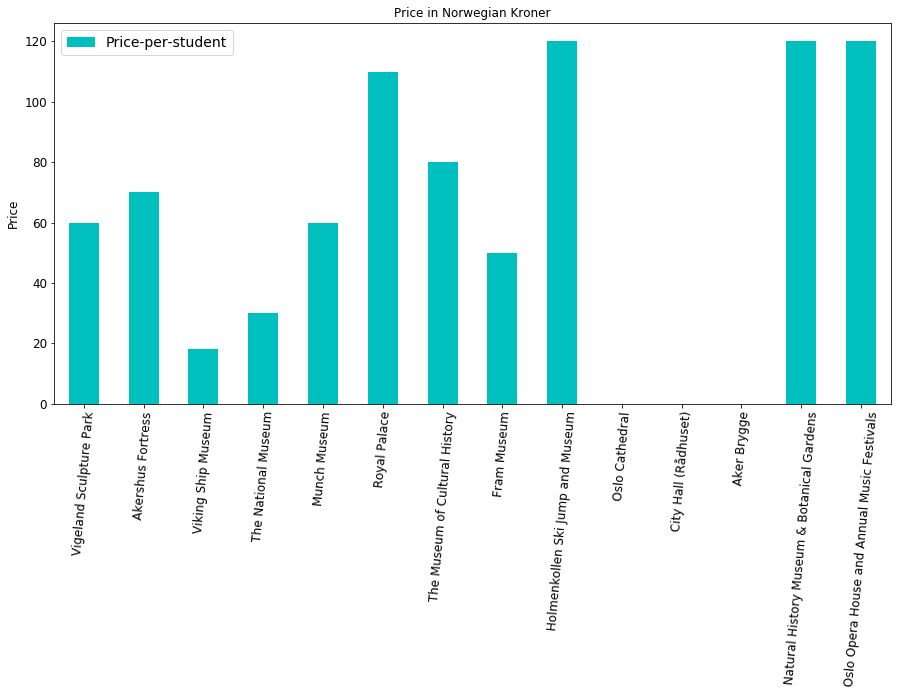

In [56]:
ax = df_all[['Price-per-student']].plot(kind='bar', title ="Price in Norwegian Kroner", figsize=(15,7), color='c', rot=85, legend=True)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.legend(fontsize = 14)
plt.tick_params(labelsize=12)
plt.show()

## Note
It is very likely the client in Ireland will most likely reduce the number of attraction places to about five or six. But it is good to notice that visits to Oslo Cathedral, Aker Brygge and the 'Oslo City Hall' (Rådhuset) if free of charge. Aker Brygge will suit any students of science while Oslo cathedral and Rådhuset will definitely be top choices for students of history. The zero price is significant to note when making a final list of the places for students to visit.

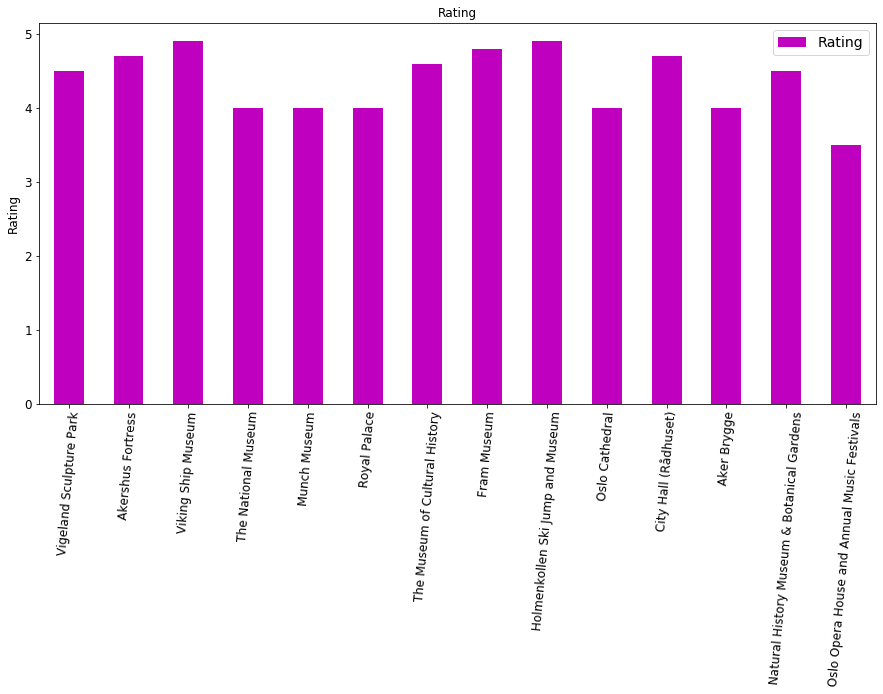

In [57]:
ax = df_all[['Rating']].plot(kind='bar', title ="Rating", figsize=(15,7), color='m', rot=85, legend=True)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Rating", fontsize=12)
plt.legend(fontsize = 14)
plt.tick_params(labelsize=12)
plt.show()

## Note
Holmenkollen Ski Jump and Museum and Viking Ship Museum are the only to museums listed by the Schools History and Geography Education Project. It can be seen that their ratings are the highest. We therefore, recommend these two to be among the best attraction centers for the students to visit in the course of a three-day visit to Oslo

## 4. Using Foursquare API to obtain Locations

### One major goal here is to plan ahead to locate available restaurant for the students' dinner as they have voted overwhelmingly to have dinner at an Italian restaurant 

In [58]:
CLIENT_ID = 'YVPBNCUL4G2JQ15FSH1WO234FVZHAS31GSEWRRVBHZ4MMMRI' # your Foursquare ID
CLIENT_SECRET = 'LSEXPCJQZIXVEFYLSCAXDBVNVW0H10BX3L1U5IW2M23EU2EX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails: MOJ')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails: MOJ
CLIENT_ID: YVPBNCUL4G2JQ15FSH1WO234FVZHAS31GSEWRRVBHZ4MMMRI
CLIENT_SECRET:LSEXPCJQZIXVEFYLSCAXDBVNVW0H10BX3L1U5IW2M23EU2EX


#### Let's take a look at the location (lat. and lng. of the first venue in this list), which is 
'Nobels gate 32, N-0268 Oslo', located in the heart of Oslo.
In the main data exploration we shall use a JSON file or use python 'for loop' to generate the location of all the 14 venues

In [59]:
address = 'Nobels gate 32, N-0268 Oslo'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

59.922816 10.700466


#### Location (lng and lat) for all the Attraction Centers

In [60]:
addresses = ['Nobels gate 32, N-0268 Oslo', 'Akershus Festning, 0015 Oslo', 'Frederiks gate 2, 0164 Oslo',
             'Universitetsgata 13, Oslo', 'Tøyengata 53, 0578 Oslo', 'Bellevue, Oslo', 'Frederiks gate 2, 0164 Oslo', 'Bygdøynesveien 39, 0286 Oslo',
             'Kongeveien 5, 0787 Oslo', 'Karl Johansgate 11, 0154 Oslo', 'Rådhuset, 0037 Oslo',
             'Bryggegata 9, 0120 Oslo', 'Sars gate 1, 0562 Oslo', 'Kirsten Flagstads Plass 1, 0150 Oslo']
geolocator = Nominatim(user_agent="foursquare_agent")
for add in addresses:
    location = geolocator.geocode(add)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

59.922816 10.700466
59.9065863 10.7378627
59.916808 10.735398
59.91620355 10.7375404541528
59.916937 10.773577
44.4643809 -87.9406845
59.916808 10.735398
59.90336175 10.6995504838587
59.962632 10.666289
59.91199 10.746575
59.91222 10.730143
59.910636 10.725937
59.9197905 10.7710802
59.90728015 10.7531208091572


## 5. Hotel Accommodation/ Restaurant


The students and the accompanying teachers will be staying at the Scandic hotel. The objective is for them to be stick around as close as possible and both in terms of accommodation and choosing a restaurant. So let's start by converting the Scandic Hotel's address to its latitude and longitude coordinates

In [61]:
address = 'St. Olavs plass 1, 0165 Oslo'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

59.918159 10.739833


The popular menu for dinner amongst students is 'Chinese'. This will be covered by the project budget. So, let's define a query to search for Chinese food that is within 500 metres from the Oslo Scandic Hotel. 

In [62]:
search_query = 'Italian'
radius = 1000
print(search_query + ' .... OK!')

Italian .... OK!


#### Define the corresponding URL

In [63]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YVPBNCUL4G2JQ15FSH1WO234FVZHAS31GSEWRRVBHZ4MMMRI&client_secret=LSEXPCJQZIXVEFYLSCAXDBVNVW0H10BX3L1U5IW2M23EU2EX&ll=59.918159,10.739833&v=20180604&query=Italian&radius=1000&limit=30'

#### Send the GET Request and examine the results

In [64]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d08a5fadb1d81002c7be279'},
 'response': {'venues': [{'id': '5918a0276e465058f79d57eb',
    'name': "Jamie's Italian",
    'location': {'address': '63 Stranden',
     'crossStreet': 'Fjordalléen',
     'lat': 59.90922148055375,
     'lng': 10.725698725329186,
     'labeledLatLngs': [{'label': 'display',
       'lat': 59.90922148055375,
       'lng': 10.725698725329186}],
     'distance': 1269,
     'postalCode': '0250',
     'cc': 'NO',
     'city': 'Oslo',
     'state': 'Oslo',
     'country': 'Norge',
     'formattedAddress': ['63 Stranden (Fjordalléen)', '0250 Oslo', 'Norge']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1560847866',
    'hasPerk': False},
   {'id': '5379fc1c498e

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [65]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5918a0276e465058f79d57eb,63 Stranden,NO,Oslo,Norge,Fjordalléen,1269,"[63 Stranden (Fjordalléen), 0250 Oslo, Norge]","[{'label': 'display', 'lat': 59.90922148055375...",59.909221,10.725699,0250,Oslo,Jamie's Italian,v-1560847866
1,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5379fc1c498e7975530b7b23,Storgata 53A,NO,Oslo,Norge,NaN,995,"[Storgata 53A, 0182 Oslo, Norge]","[{'label': 'display', 'lat': 59.91663941486331...",59.916639,10.757412,0182,Oslo,Italian Restaurant,v-1560847866
2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,54822318498e94b4fa21b111,Møllergata 10,NO,Oslo,Norge,NaN,582,"[Møllergata 10, 0179 Oslo, Norge]","[{'label': 'display', 'lat': 59.91433334350586...",59.914333,10.746948,0179,Oslo,Lille Italiano,v-1560847866
3,"[{'id': '4bf58dd8d48988d12c951735', 'name': 'E...",False,53329b31498e629c35be0d0f,Inkognitogata 7,NO,Oslo,Norge,NaN,888,"[Inkognitogata 7, Oslo, Norge]","[{'label': 'display', 'lat': 59.92069730695009...",59.920697,10.724738,NaN,Oslo,Ambasciata Italiana a Oslo,v-1560847866


#### Define information of interest and filter dataframe

In [66]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Jamie's Italian,Italian Restaurant,63 Stranden,NO,Oslo,Norge,Fjordalléen,1269,"[63 Stranden (Fjordalléen), 0250 Oslo, Norge]","[{'label': 'display', 'lat': 59.90922148055375...",59.909221,10.725699,0250,Oslo,5918a0276e465058f79d57eb
1,Italian Restaurant,Italian Restaurant,Storgata 53A,NO,Oslo,Norge,NaN,995,"[Storgata 53A, 0182 Oslo, Norge]","[{'label': 'display', 'lat': 59.91663941486331...",59.916639,10.757412,0182,Oslo,5379fc1c498e7975530b7b23
2,Lille Italiano,Italian Restaurant,Møllergata 10,NO,Oslo,Norge,NaN,582,"[Møllergata 10, 0179 Oslo, Norge]","[{'label': 'display', 'lat': 59.91433334350586...",59.914333,10.746948,0179,Oslo,54822318498e94b4fa21b111
3,Ambasciata Italiana a Oslo,Embassy / Consulate,Inkognitogata 7,NO,Oslo,Norge,NaN,888,"[Inkognitogata 7, Oslo, Norge]","[{'label': 'display', 'lat': 59.92069730695009...",59.920697,10.724738,NaN,Oslo,53329b31498e629c35be0d0f


#### View most relevant columns

In [67]:
dataframe_filtered[['name', 'categories', 'address', 'distance', 'formattedAddress']]

,name,categories,address,distance,formattedAddress
0,Jamie's Italian,Italian Restaurant,63 Stranden,1269,"[63 Stranden (Fjordalléen), 0250 Oslo, Norge]"
1,Italian Restaurant,Italian Restaurant,Storgata 53A,995,"[Storgata 53A, 0182 Oslo, Norge]"
2,Lille Italiano,Italian Restaurant,Møllergata 10,582,"[Møllergata 10, 0179 Oslo, Norge]"
3,Ambasciata Italiana a Oslo,Embassy / Consulate,Inkognitogata 7,888,"[Inkognitogata 7, Oslo, Norge]"


#### Let's visualize the Italian restaurants that are nearby
This will be handy for all members of the team when it's getting close to dinner time

In [68]:
dataframe_filtered.name

0               Jamie's Italian
1            Italian Restaurant
2                Lille Italiano
3    Ambasciata Italiana a Oslo
Name: name, dtype: object

In [69]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Scandic Hotel

# add a red circle marker to represent the Scandic Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Scandic Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## 6. Results
Indeed the trips can be planned by the school eve though the flight tickets are to be taken care of by the parents and guardians of the students.

#### The students, teachers, The Irish Ministry of Education, Schools History and Geography Education Project board (SHGP) and The Secondary School Heads Union (SSHU) now have  first hand information:

1. A project plan (both in digital and paperback format) that will be available for everyone, including students
2. The detailed names of attraction centres (museums, etc)
2. The websites of the visiting centers can be visited and explored even long before a schedule trip
4. The addresses of all attraction centres are now known.
5. Price information is fully available 
6. Ratings for all museums are obtained 
7. Information regarding hotel and accommodation is clear
8. A brief map of the Hotel neighborhood is handy, which includes the restaurants chosen for the visit


## 7. Recommendation
1. The price and ratings may change by 2020, so an up to date information should be appended to the project plan by the Schools History and Geography Education Project board (SHGP). 

2. After the first visit by the Granda Hight School students in 2020, there should be a survey to generate feedback with intention of improving the next visit to Norway.


## 8. Conclusion
We have used the power FourSquare and other Data Science tools to show that a group trip from one country to another can be well planned by simply get information involving available data without the hassles of embarking on too many trips and a long chain of meetings. The wonderful feature of FourSquare API has helpled us to pre-plan a journey and studying our neighborhood with clean and clear maps.

### Data Science can indeed make trips and journeys and even the future education of next generation of students much much easier.